# Exploratory data analysis

http://patbaa.web.elte.hu/physdm/data/titanic.csv

On the link above you will find a dataset about the Titanic passengers. Your task is to explore the dataset.

Help for the columns:
 - SibSp - number of sibling/spouses on the ship
 - Parch - number of parent/children on the ship
 - Cabin - the cabin they slept in (if they had a cabin)
 - Embarked - harbour of entering the ship
 - Pclass - passenger class (like on trains)

In [3]:
import os
import datetime
import numpy as np
import pandas as pd
from tabulate import tabulate

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from IPython.display import clear_output, display

### Just some matplotlib and seaborn parameter tuning

In [4]:
data = './data/'
out = './out/'
figsave_format = 'png'
figsave_dpi = 200

axistitlesize = 22
axisticksize = 17
axislabelsize = 26
axislegendsize = 23
axistextsize = 15

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

## 1. Preprocessing

Load the above-linked csv file as a pandas dataframe. Check & plot if any of the columns has missing values. If they have, investigate if the missingness is random or not. 

Impute the missing values in a sensible way:
 - if only a very small percentage is missing, imputing with the column-wise mean makes sense, or also removing the missing rows makes sense
 - if in a row almost all the entries is missing, it worth to remove that given row
 - if a larger portion is missing from a column, usually it worth to encode that with a value that does not appear in the dataset (eg: -1). 
 
The imputing method affects different machine learning models different way, but now we are interested only in EDA, so try to keep as much information as possible!

### Load data

In [5]:
os.listdir(data)

['titanic.csv']

In [6]:
df = pd.read_csv(data + 'titanic.csv', sep=',')

In [7]:
display(df.head())
display(df.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Explore missing entries

In [13]:
# Mask to analyze missing entries easier
nan_mask = df.isna()

### Number of missing values

In [14]:
nan_count = nan_mask.sum()

In [15]:
print('Count of missing values:\n' +
      '========================')
print(tabulate([[c, nan_count[c]] for c in nan_count.index], headers=['Column', 'Count of NaNs']))

Count of missing values:
Column         Count of NaNs
-----------  ---------------
PassengerId                0
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                      177
SibSp                      0
Parch                      0
Ticket                     0
Fare                       0
Cabin                    687
Embarked                   2


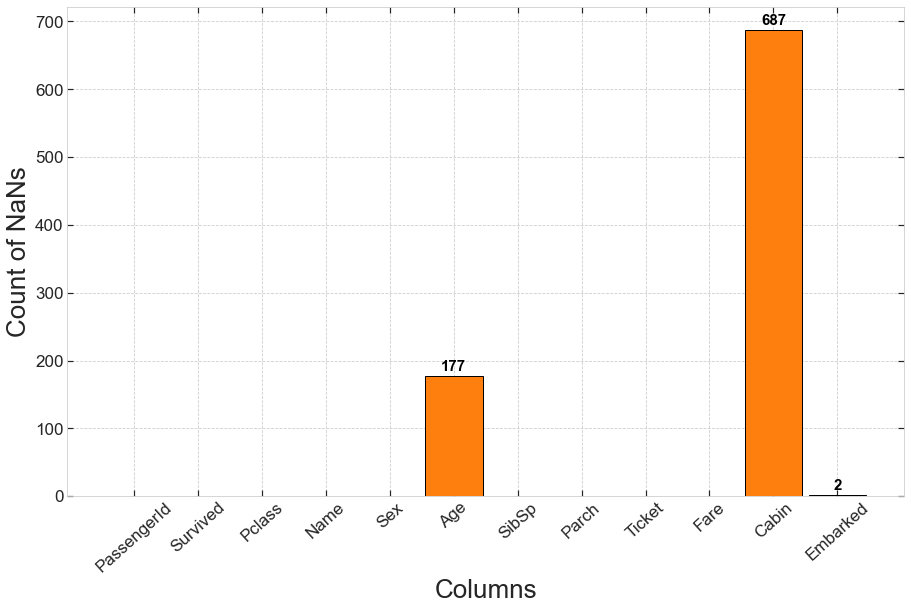

In [16]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*15, nrows*9))

axes.bar(nan_count.index, nan_count.values, width=0.9,
         color='tab:orange', ec='black', align='center')
# Write height value of bars over them for clarity
for i, v in enumerate(nan_count):
    if v != 0:
        axes.text(x=i, y=(v+14), s=str(v),
                  ha='center', va='center',
                  color='black',
                  fontsize=axistextsize, fontweight='bold')

axes.set_xlabel('Columns', fontsize=axislabelsize)
axes.set_ylabel('Count of NaNs', fontsize=axislabelsize)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)
axes.tick_params(axis='x', which='major', rotation=42)

plt.show()

### Correlation of missing entries

Since there are effectively only two columns with missing entries, I have to deal with these only in my analysis. The figure above shows, that there are $177$ rows with missing `Age` entires and $687$ with missing `Cabin` entries in the dataset. To discover any correlation between these columns, we can count how many rows are missing both of them. If there are a lot of rows, where there are both values are missing, we can confidently declare, there is probably a correlation between the missingness of entries in these columns.

In [71]:
# Count rows where
nan_rows_cab = nan_mask[(nan_mask['Cabin']) & (~nan_mask['Age'])].sum().sum()
nan_rows_age = nan_mask[(nan_mask['Age']) & (~nan_mask['Cabin'])].sum().sum()
nan_rows_both = nan_mask[(nan_mask['Cabin']) & (nan_mask['Age'])].sum().sum()/2

# Collecting all into lists
corr_plot_x = ['Cabin', 'Both', 'Age']
corr_plot_y = [nan_rows_cab, nan_rows_age, nan_rows_both]

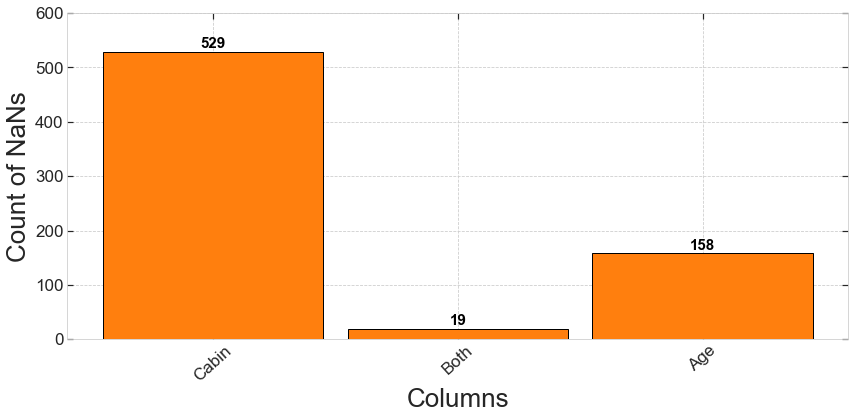

In [83]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*14, nrows*6))

axes.bar(corr_plot_x, corr_plot_y, width=0.9,
         color='tab:orange', ec='black', align='center')
# Write height value of bars over them for clarity
for i, v in enumerate(corr_plot_y):
    axes.text(x=i, y=(v+14), s=str(int(v)),
              ha='center', va='center',
              color='black',
              fontsize=axistextsize, fontweight='bold')
# Just for the over-bar number to look better
axes.set_ylim(None, 600)

axes.set_xlabel('Columns', fontsize=axislabelsize)
axes.set_ylabel('Count of NaNs', fontsize=axislabelsize)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)
axes.tick_params(axis='x', which='major', rotation=42)
    
plt.show()

The analysis clearly shows, there is no correlation between the missingness of entries in the columns `Age` and `Cabin`.

## 2. Heatmap
Create a heatmap which shows how many people survived and dies with the different Pclass variables. You need to create a table where the columns indicates if a person survived or not, the rows indicates the different Pclass and the cell values contains the number of people belonging the that given category. The table should be colored based on the value of the cells in the table.

## 3. Boxplots

Create boxplots for each different Pclass. The boxplot should show the age distribution for the given Pclass. Plot all of these next to each other in a row to make it easier to compare!

## 4. Correlation matrix

Calculate the correlation matrix for the numerical columns. Show it also as a heatmap described at the 1st task. Which feature seems to play the most important role in surviving/not surviving? Explain how and why could that feature be important! 

## 5. Interpretation

Create two plots which you think are meaningful. Interpret both of them. (Eg.: older people buy more expensive ticket? people buying more expensive ticket survive more? etc.)

### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 